# Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Лабораторная работа №2

##  Часть 1

### Задание 3

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# 1) Разбиение датасета
train_valid, test = train_test_split(df, test_size = 0.1)
train, valid = train_test_split(train_valid, test_size = 0.1)
print ('тренировочная ',train.shape, 'валидационная ', valid.shape,'тестовая ', test.shape )

тренировочная  (16718, 10) валидационная  (1858, 10) тестовая  (2064, 10)


In [4]:
# 2) Преобразование категориального признака ocean_proximity через Dummy-кодировку
DUMMY_SEP = '__'

df = pd.get_dummies(df, columns=["ocean_proximity"], prefix_sep=DUMMY_SEP)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [5]:
# 3) Замена признаков total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).
df['average_rooms'] = df['total_rooms']/df['households']
df['average_bedrooms'] = df['total_bedrooms']/df['households']

df = df.drop('total_rooms', axis=1)
df = df.drop('total_bedrooms', axis=1)

df.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081


In [6]:
# 4) Просмотр кол-ва пропусков
df.isna().sum()

longitude                        0
latitude                         0
housing_median_age               0
population                       0
households                       0
median_income                    0
median_house_value               0
ocean_proximity__<1H OCEAN       0
ocean_proximity__INLAND          0
ocean_proximity__ISLAND          0
ocean_proximity__NEAR BAY        0
ocean_proximity__NEAR OCEAN      0
average_rooms                    0
average_bedrooms               207
dtype: int64

In [7]:
# Заполнение пропусков с помощью предсказания данных

# Разделяем df на 2 части:
df_no_nan = df.loc[df['average_bedrooms'].isna() == False] # df без колонок с пустыми значениями
df_nan_only = df.loc[df['average_bedrooms'].isna() == True] # df с колоноками с пустыми значениями

# Создаем X и Y для df без пустых значений, удаляя median_house_value
df_no_nan_no_median = df_no_nan.drop('median_house_value', axis=1)
df_no_nan_no_median_x = df_no_nan_no_median.drop('average_bedrooms', axis=1)
df_no_nan_no_median_y = df_no_nan_no_median['average_bedrooms']

# Создаем регрессионную модель с помощью данных X и Y (при таком-то значении average_bedrooms колонки равны X)
reg = LinearRegression()
reg.fit(df_no_nan_no_median_x, df_no_nan_no_median_y ) 

# Создаем X для df только с пустыми значениями
df_nan_only_no_median = df_nan_only.drop('median_house_value', axis=1)
df_nan_only_no_median_x = df_nan_only_no_median.drop('average_bedrooms',axis=1)

# Создаем предсказания по этим значениям X и заменяем NaN на значения предсказаний
df_nan_only.loc[:]['average_bedrooms'] = reg.predict(df_nan_only_no_median_x)

# Заменяем значения NaN в исходной df
df['average_bedrooms'].fillna(value=df_nan_only['average_bedrooms'], inplace=True)

In [8]:
# Применим изменения на выборках
train_valid, test = train_test_split(df, test_size = 0.1)
train, valid = train_test_split(train_valid, test_size = 0.1)

# Проверяем отсутствие пропусков
df.isna().sum()

longitude                      0
latitude                       0
housing_median_age             0
population                     0
households                     0
median_income                  0
median_house_value             0
ocean_proximity__<1H OCEAN     0
ocean_proximity__INLAND        0
ocean_proximity__ISLAND        0
ocean_proximity__NEAR BAY      0
ocean_proximity__NEAR OCEAN    0
average_rooms                  0
average_bedrooms               0
dtype: int64

In [9]:
# 5) Нормализация признаков longitude и latitude
def norm(df_sample):
    df_sample['longitude'] -= np.mean(train['longitude']) # x - u
    df_sample['latitude'] -= np.mean(train['latitude'])
    
    df_sample['longitude'] /= np.std(train['longitude'])  # (x-u)/o
    df_sample['latitude'] /= np.std(train['latitude'])

norm(df)
norm(train)
norm(valid)
norm(test)

In [10]:
print('Сред. значения: ',np.mean(train['longitude']) , np.mean(train['latitude']), '(при округл. = 0)')
print('Дисперсия: ', np.var(train['longitude']) , np.var(train['latitude']))

Сред. значения:  -4.550227616370159e-15 -1.7289674895753603e-15 (при округл. = 0)
Дисперсия:  1.0000000000000002 1.0000000000000002


##  Часть 2

### Задание 1

In [11]:
# Датасет Davis = df
df = pd.read_csv('Davis.csv')
df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [12]:
# 1) Удалите некорректные данные

# Удаляем данные о людях ниже 70 см 
df = df.loc[df['height'] > 70]

# Удаляем ненужную колонку Unnamed
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [13]:
# Делаем проверку на NaN значений
df.isna().sum()

sex        0
weight     0
height     0
repwt     17
repht     17
dtype: int64

In [14]:
# Удаляем такие строки
df.dropna( inplace=True )
df.isna().sum()

sex       0
weight    0
height    0
repwt     0
repht     0
dtype: int64

In [15]:
# 2) Выделите тестовую выборку из 50 экземпляров
train, test = train_test_split(df, test_size = 50)
print ('тренировочная ',train.shape, 'тестовая ', test.shape )

тренировочная  (130, 5) тестовая  (50, 5)


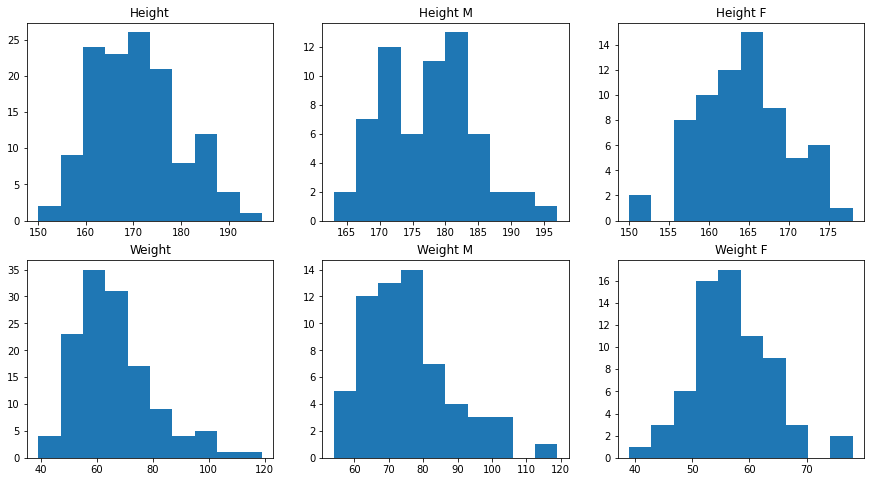

In [16]:
# 3) На тренировочных данных постройте: Гистограмму height, Гистограмму weight + для разных полов

train_male = train.loc[df['sex'] == 'M']
train_female = train.loc[df['sex'] == 'F']

fig, ax = plt.subplots(2, 3, figsize=(15,8))

ax[0][0].hist(train['height'])
ax[0][0].set_title('Height')

ax[0][1].hist(train_male['height'])
ax[0][1].set_title('Height M')

ax[0][2].hist(train_female['height'])
ax[0][2].set_title('Height F')


ax[1][0].hist(train['weight'])
ax[1][0].set_title('Weight')

ax[1][1].hist(train_male['weight'])
ax[1][1].set_title('Weight M')

ax[1][2].hist(train_female['weight'])
ax[1][2].set_title('Weight F')
pass

In [17]:
# 4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight.
# Замерьте производительность на тренировочной и тестовой выборке (через Accuracy).

train_x = train[['height', 'weight']]
train_y = train['sex']

test_x = test[['height', 'weight']]
test_y = test['sex']

# Логистическая регрессия
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

# Предсказываем по модели
train_predictions = logreg.predict(train_x)
test_predictions = logreg.predict(test_x)

print('Accuracy train: ', accuracy_score(train_predictions, train_y))
print('Accuracy test: ', accuracy_score(test_predictions, test_y))

Accuracy train:  0.8769230769230769
Accuracy test:  0.96


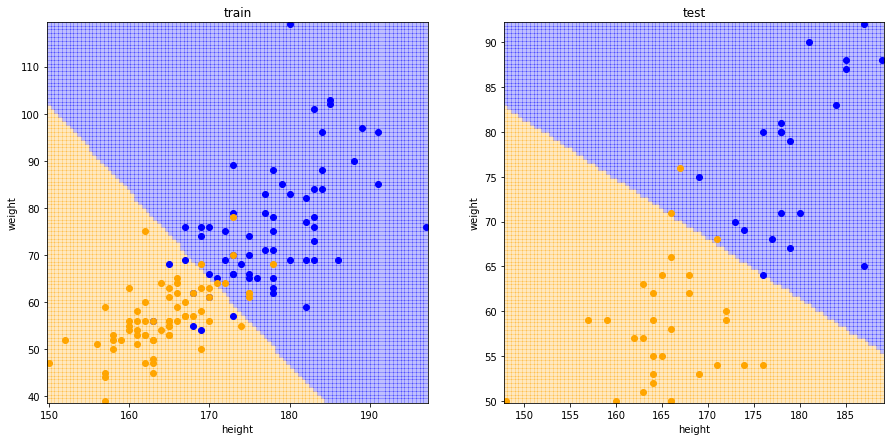

In [18]:
# 5) Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. 
# Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором.

fig, ax = plt.subplots(1, 2, figsize=(15,7))
color_list = ListedColormap(['blue', 'orange']) # Цвета для заливки


# Функция создает из точек роста и веса все пары между друг другом
def hw_points(height_points,weight_points):
    all_points = list(itertools.product(height_points, weight_points))
    return all_points

# Создание предсказаний по модели из п.4
def make_predictions(h_points , w_points, size):
    points = pd.DataFrame({'height': np.asarray(hw_points(h_points,w_points))[:,0] , 
                            'weight': np.asarray(hw_points(h_points,w_points))[:,1]}) # преобразуем точки из tuples в Pandas.Df
    predictions = logreg.predict(points) # используем модель из п.4
    predictions[predictions == 'M'] = 0
    predictions[predictions == 'F'] = 1
    predictions = (np.int32)(predictions).reshape(size,size)
    return predictions


#########################
# Тренировочная выборка #

# Для заливки создаем 100 точек (границы из мин/макс. элемента выборки)
h_points = np.linspace(train_x['height'].min() , train_x['height'].max() , 100)
w_points = np.linspace(train_x['weight'].min() , train_x['weight'].max() , 100)
# Создаем предсказания по созданным точкам для заливки
predictions = make_predictions(h_points, w_points, 100)

# Заливка тренировочной выборки
ax[0].pcolor(h_points, w_points, predictions, alpha=0.25, cmap=color_list)

# Отрисовка точек тренировочной выборки
ax[0].scatter( train_male['height'], train_male['weight'], color='blue')
ax[0].scatter( train_female['height'], train_female['weight'], color='orange')
ax[0].set_title('train')
ax[0].set_xlabel("height")
ax[0].set_ylabel("weight")


####################
# Тестовая выборка #

h_points = np.linspace(test_x['height'].min() , test_x['height'].max() , 100)
w_points = np.linspace(test_x['weight'].min() , test_x['weight'].max() , 100)
predictions = make_predictions(h_points, w_points ,100)

ax[1].pcolor(h_points, w_points, predictions, alpha=0.25, cmap=color_list)

# Создание точек тестовой выборки (train_male/female были созданы в п.3)
test_male = test.loc[df['sex'] == 'M']
test_female = test.loc[df['sex'] == 'F']

ax[1].scatter( test_male['height'], test_male['weight'],  color='blue')
ax[1].scatter( test_female['height'], test_female['weight'], color='orange')
ax[1].set_title('test')
ax[1].set_xlabel("height")
ax[1].set_ylabel("weight")

pass

### Задание 2

In [43]:
df = pd.read_excel("Folds5x2_pp.xlsx", sheet_name = "Sheet1")

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [44]:
# 1) Разбиение датасета 

train_valid, test = train_test_split(df, test_size = 0.1)
train, valid = train_test_split(train_valid, test_size = 0.1)
print ('тренировочная ',train.shape, 'валидационная ', valid.shape,'тестовая ', test.shape )

тренировочная  (7749, 5) валидационная  (862, 5) тестовая  (957, 5)


In [45]:
# 2) Постройте регрессионную модель. Замерьте коэффициент R^2 и среднюю ошибку предсказания на валидационной выборке.

train_y = train['PE'] # predict the net hourly electrical energy output (EP) => предсказание
train_x = train.drop('PE', axis=1) # в X убираем PE

valid_y = valid['PE']
valid_x = valid.drop('PE', axis=1)

linreg = LinearRegression().fit(train_x, train_y)

predictions = linreg.predict(valid_x)
mse = mean_squared_error(predictions, valid_y)

print('R^2: ', linreg.score(train_x, train_y))
print('MSE: ', mse)


R^2:  0.9279503864254627
MSE:  19.88840751609804


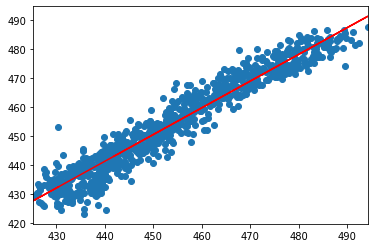

In [46]:
# 3) Постройте точки из валидационной выборки на плоскости. Отобразите вместе с ними прямую y=t. 

line_k, line_b = np.polyfit(valid_y, predictions, 1) # y=k*t+b , ищутся k и b, чтобы y=t
t = valid_y # t - истинное значение

plt.xlim(t.min(), t.max())
plt.scatter(t, predictions) # точки
plt.plot(t, line_k * t + line_b, color = 'r') # линия

plt.show()